In [4]:
from MMn import simulate_MMn
import numpy as np
from scipy.stats import f_oneway
from matplotlib import pyplot as plt

In [26]:
sig_cust = []
rhos = np.linspace(0.8, 0.95, 50)
customers = 1000
simulations = 100
for _ in range(simulations):
    res = []
    for rho in rhos:
        W1 = simulate_MMn(customers, rho, 1, 1)
        W2 = simulate_MMn(customers, rho, 1, 2)
        W4 = simulate_MMn(customers, rho, 1, 4)
        for i in range(len(W1), 2, -1):
            _, p = f_oneway(W1[:i], W2[:i], W4[:i])
            if p > 0.05:
                res.append(i)
                break
        if i == 3:
            res.append(2)
    sig_cust.append(res)
    
sig_cust = np.array(sig_cust)

cust_mean = np.mean(sig_cust, axis=0)
cust_std = np.std(sig_cust, axis=0, ddof=1) * 1.96 / np.sqrt(simulations)
        
    # _, p = f_oneway(W1, W2, W4)
    # if p > 0.05:
    #     sig_rho.append(rho)
    #     sig_cust.append(customers)
    #     break


#plt.plot(sig_rho[:5] + sig_rho[6:], sig_cust[0:5] + sig_cust[6:])
plt.plot(rhos, cust_mean, marker='o')
plt.xlabel('rho')
plt.ylabel('customers')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100,) + inhomogeneous part.

In [23]:
print(sig_cust)

[[1000, 999, 998, 997, 996, 995, 994, 993, 992, 991, 990, 989, 988, 987, 986, 985, 984, 983, 982, 981, 980, 979, 978, 977, 976, 975, 974, 973, 972, 971, 970, 969, 968, 967, 966, 965, 964, 963, 962, 961, 960, 959, 958, 957, 956, 955, 954, 953, 952, 951, 950, 949, 948, 947, 946, 945, 944, 943, 942, 941, 940, 939, 938, 937, 936, 935, 934, 933, 932, 931, 930, 929, 928, 927, 926, 925, 924, 923, 922, 921, 920, 919, 918, 917, 916, 915, 914, 913, 912, 911, 910, 909, 908, 907, 906, 905, 904, 903, 902, 901, 900, 899, 898, 897, 896, 895, 894, 893, 892, 891, 890, 889, 888, 887, 886, 885, 884, 883, 882, 881, 880, 879, 878, 877, 876, 875, 874, 873, 872, 871, 870, 869, 868, 867, 866, 865, 864, 863, 862, 861, 860, 859, 858, 857, 856, 855, 854, 853, 852, 851, 850, 849, 848, 847, 846, 845, 844, 843, 842, 841, 840, 839, 838, 837, 836, 835, 834, 833, 832, 831, 830, 829, 828, 827, 826, 825, 824, 823, 822, 821, 820, 819, 818, 817, 816, 815, 814, 813, 812, 811, 810, 809, 808, 807, 806, 805, 804, 803, 802, 80

c:\Users\ravis\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))
c:\Users\ravis\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


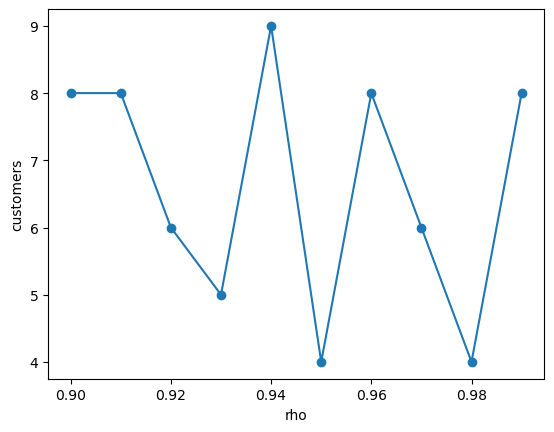

In [16]:
sig_cust = []
sig_rho = []

for rho in np.linspace(0.9, 0.99, 10):
    for customers in range(1, 120, 1):
        W1 = simulate_MMn(customers, rho, 1, 1)
        W2 = simulate_MMn(customers, rho, 1, 2)
        W4 = simulate_MMn(customers, rho, 1, 4)
        _, p = f_oneway(W1, W2, W4)
        if p < 0.05:
            sig_rho.append(rho)
            sig_cust.append(customers)
            break


#plt.plot(sig_rho[:5] + sig_rho[6:], sig_cust[0:5] + sig_cust[6:])
plt.plot(sig_rho, sig_cust)
plt.scatter(sig_rho, sig_cust)
plt.xlabel('rho')
plt.ylabel('customers')
plt.show()